In [1]:
import pandas as pd
import numpy as np
import multibind as mb
from multibind import MultibindScanner
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
from glob import glob
from scipy import constants
import matplotlib as mpl
from collections import defaultdict
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib import font_manager as fm
import matplotlib
mpl.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.size'] = '10'

# Load files

In [3]:
pHs = [5.6, 6.0, 6.5, 6.9]
target = glob('target/*.csv')
concentrations = [np.array([1])]

for csv in target:
    df = pd.read_csv(csv)
    concentrations.append(df.Dose)
data = defaultdict()

for ph in pHs:
    df = pd.read_csv('target/pH{}.csv'.format(ph))
    data[ph] = df

# Run multibind to obtain microstate probabilities

In [4]:
pHs = [5.6, 6.0, 6.5, 6.9]
concentrations = 10**np.linspace(-12,-2,201)
concen = {'pH': pHs, 'Zn': concentrations}
scanner = MultibindScanner('states.csv', 'result.csv')
scanner.run(concen)

In [5]:
msp = scanner.results.microstate_probs
expected = defaultdict()
for p in pHs:
    prob = np.dot(np.array(scanner.c.states.Zn), msp.sel({'pH': p}).values)
    expected[p] = prob

# Fig. 4

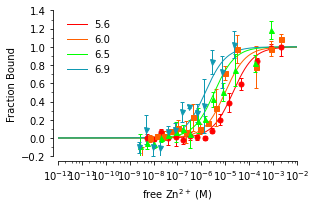

In [6]:
plt.ion()
figure, ax = plt.subplots(figsize=[4.5, 3])
sns.despine(ax=ax, offset=5)

plot_ph = defaultdict()
colors = ['#ff0000', '#ff6000', '#00ff00', '#0f99b2', '#0000ff']
symbol = ['o', 's', '^', 'v', 'D']
for ph, color, symb in zip(pHs, colors, symbol):
    uptake_line, = ax.plot(concentrations, expected[ph], color=color, label=str(ph), linewidth=1)
    ax.errorbar(data[ph].Dose, data[ph].Response, yerr=data[ph]['Err-Values'], color=color, capsize=2, fmt=symb, markersize=5, linewidth=1)
ax.set_ylabel(r"Fraction Bound")
ax.set_xlabel(r"free Zn$^{2+}$ (M)")
ax.set_xscale("log", nonpositive='clip')
ax.set_ylim([-0.2, 1.4])
ax.set_xlim([1e-12, 1e-2])
ax.legend(frameon=False)
plt.tick_params(axis='y', which='minor')
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
locmin = mpl.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8,1),numticks=12)
locmaj = mpl.ticker.LogLocator(base=10.0,numticks=12)
ax.set_yticks([-0.2,0,0.2,0.4,0.6,0.8,1.0,1.2,1.4])
ax.xaxis.set_major_locator(locmaj)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
plt.tight_layout()
plt.savefig('/nfs/homes4/sfan/Projects/Transporters/YiiP/multibind/newMST/siteB/sym/figure/MC_siteB.pdf', dpi=300)

# Suppl. Fig. 11

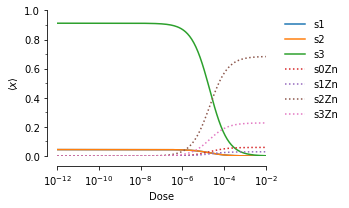

In [5]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1, 1, 1)
sns.despine(offset=10, ax=ax)
probs = msp.sel({'pH': 5.6}).values
ax.set_ylabel(r"$\langle x \rangle$")
ax.set_xlabel(r"Dose")

labels = ['s{}'.format(i) for i in range(0,8)] +  ['s{}Zn'.format(i) for i in range(0,8)]
for i in range(0,16):
    if i>7:
        marker = ':'
        if probs[i,-1]>0.001:
            ax.plot(concentrations, probs[i,:], label=labels[i], ls=marker)
    else:
        marker = '-'
        if probs[i,0]>0.001:   
            ax.plot(concentrations, probs[i,:], label=labels[i], ls=marker)
ax.set_xscale("log", nonpositive='clip')
ax.legend(ncol=1, frameon=False, bbox_to_anchor=(1.05, 1))
ax.set_ylim([0, 1.0])
ax.set_xlim([1e-12, 0.01])
plt.tick_params(axis='y', which='minor')
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8,1),numticks=12)
locmaj = matplotlib.ticker.LogLocator(base=10.0,numticks=6)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1.0,])
plt.tight_layout()
plt.savefig('/nfs/homes4/sfan/Projects/Transporters/YiiP/multibind/newMST/siteB/sym/figure/pH56.pdf', dpi=300)
plt.savefig('/nfs/homes4/sfan/Projects/Transporters/YiiP/multibind/newMST/siteB/sym/figure/pH56.png', dpi=300)

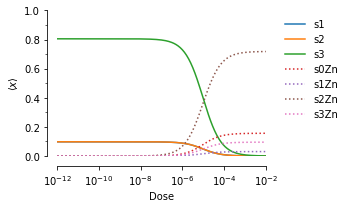

In [6]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1, 1, 1)
sns.despine(offset=10, ax=ax)
probs = msp.sel({'pH': 6.0}).values
ax.set_ylabel(r"$\langle x \rangle$")
ax.set_xlabel(r"Dose")

labels = ['s{}'.format(i) for i in range(0,8)] +  ['s{}Zn'.format(i) for i in range(0,8)]
for i in range(0,16):
    if i>7:
        marker = ':'
        if probs[i,-1]>0.001:
            ax.plot(concentrations, probs[i,:], label=labels[i], ls=marker)
    else:
        marker = '-'
        if probs[i,0]>0.001:   
            ax.plot(concentrations, probs[i,:], label=labels[i], ls=marker)
ax.set_xscale("log", nonpositive='clip')
ax.legend(ncol=1, frameon=False, bbox_to_anchor=(1.05, 1))
ax.set_ylim([0, 1.0])
ax.set_xlim([1e-12, 0.01])
plt.tick_params(axis='y', which='minor')
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8,1),numticks=12)
locmaj = matplotlib.ticker.LogLocator(base=10.0,numticks=6)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1.0,])
plt.tight_layout()
plt.savefig('/nfs/homes4/sfan/Projects/Transporters/YiiP/multibind/newMST/siteB/sym/figure/pH60.pdf', dpi=300)
plt.savefig('/nfs/homes4/sfan/Projects/Transporters/YiiP/multibind/newMST/siteB/sym/figure/pH60.png', dpi=300)

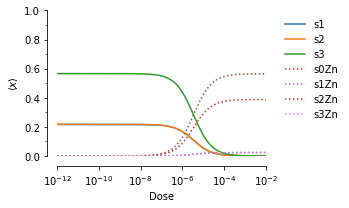

In [7]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1, 1, 1)
sns.despine(offset=10, ax=ax)
probs = msp.sel({'pH': 6.5}).values
ax.set_ylabel(r"$\langle x \rangle$")
ax.set_xlabel(r"Dose")

labels = ['s{}'.format(i) for i in range(0,8)] +  ['s{}Zn'.format(i) for i in range(0,8)]
for i in range(0,16):
    if i>7:
        marker = ':'
        if probs[i,-1]>0.001:
            ax.plot(concentrations, probs[i,:], label=labels[i], ls=marker)
    else:
        marker = '-'
        if probs[i,0]>0.001:   
            ax.plot(concentrations, probs[i,:], label=labels[i], ls=marker)
ax.set_xscale("log", nonpositive='clip')
ax.legend(ncol=1, frameon=False, bbox_to_anchor=(1.05, 1))
ax.set_ylim([0, 1.0])
ax.set_xlim([1e-12, 0.01])
plt.tick_params(axis='y', which='minor')
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8,1),numticks=12)
locmaj = matplotlib.ticker.LogLocator(base=10.0,numticks=6)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1.0,])
plt.tight_layout()
plt.savefig('/nfs/homes4/sfan/Projects/Transporters/YiiP/multibind/newMST/siteB/sym/figure/pH65.pdf', dpi=300)
plt.savefig('/nfs/homes4/sfan/Projects/Transporters/YiiP/multibind/newMST/siteB/sym/figure/pH65.png', dpi=300)

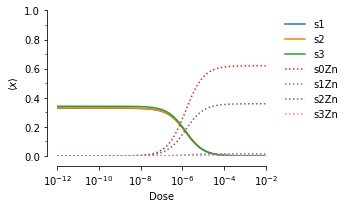

In [8]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1, 1, 1)
sns.despine(offset=10, ax=ax)
probs = msp.sel({'pH': 6.9}).values
ax.set_ylabel(r"$\langle x \rangle$")
ax.set_xlabel(r"Dose")

labels = ['s{}'.format(i) for i in range(0,8)] +  ['s{}Zn'.format(i) for i in range(0,8)]
for i in range(0,16):
    if i>7:
        marker = ':'
        if probs[i,-1]>0.001:
            ax.plot(concentrations, probs[i,:], label=labels[i], ls=marker)
    else:
        marker = '-'
        if probs[i,0]>0.001:   
            ax.plot(concentrations, probs[i,:], label=labels[i], ls=marker)
ax.set_xscale("log", nonpositive='clip')
ax.legend(ncol=1, frameon=False, bbox_to_anchor=(1.05, 1))
ax.set_ylim([0, 1.0])
ax.set_xlim([1e-12, 0.01])
plt.tick_params(axis='y', which='minor')
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8,1),numticks=12)
locmaj = matplotlib.ticker.LogLocator(base=10.0,numticks=6)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1.0,])
plt.tight_layout()
plt.savefig('/nfs/homes4/sfan/Projects/Transporters/YiiP/multibind/newMST/siteB/sym/figure/pH69.pdf', dpi=300)
plt.savefig('/nfs/homes4/sfan/Projects/Transporters/YiiP/multibind/newMST/siteB/sym/figure/pH69.png', dpi=300)

In [6]:
pHs = np.linspace(1.5, 11.5, 181)
concentrations = [10**(-20)]
concentrations = np.array(concentrations)
concen = {'pH': pHs, 'Zn': concentrations}
scanner = MultibindScanner('/nfs/homes4/sfan/Projects/Transporters/YiiP/multibind/newMST/siteB/input/states.csv', '/nfs/homes4/sfan/Projects/Transporters/YiiP/multibind/newMST/siteB/sym/average.csv')
scanner.run(concen)
msp = scanner.results.microstate_probs
c=1e-20
prob = msp.sel({'Zn': c}).values

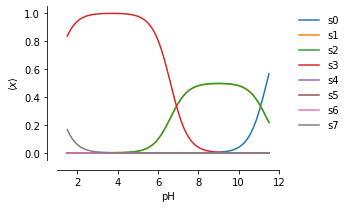

In [12]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1, 1, 1)
sns.despine(offset=10, ax=ax)
ax.set_ylabel(r"$\langle x \rangle$")
ax.set_xlabel(r"pH")

labels = ['s{}'.format(i) for i in range(0,8)] +  ['s{}Zn'.format(i) for i in range(0,16)]
for i in range(0,8):
    ax.plot(pHs, prob[i,:], label=labels[i])
ax.legend(ncol=1, frameon=False, bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.savefig('/nfs/homes4/sfan/Projects/Transporters/YiiP/multibind/newMST/siteB/sym/figure/pH.png', dpi=300)
plt.savefig('/nfs/homes4/sfan/Projects/Transporters/YiiP/multibind/newMST/siteB/sym/figure/pH.pdf', dpi=300)

In [4]:
proton_0 = np.zeros([16])
proton_1 = np.zeros([16])
proton_2 = np.zeros([16])
proton_3 = np.zeros([16])
proton_4 = np.zeros([16])
proton_0[0] = 1
proton_1[[1,2,4,8]] = 1
proton_2[[3,5,6,9,10,12]] = 1
proton_3[[7,11,13,14]] = 1
proton_4[15] = 1

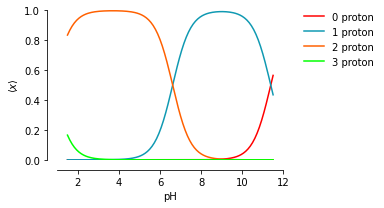

In [45]:
p_0 = np.dot(proton_0[:16], prob)
p_1 = np.dot(proton_1[:16], prob)
p_2 = np.dot(proton_2[:16], prob)
p_3 = np.dot(proton_3[:16], prob)
fig = plt.figure(figsize=(5.5,3))
ax = fig.add_subplot(1, 1, 1)
sns.despine(offset=10, ax=ax)

ax.set_xlabel(r"pH")
ax.set_ylabel(r"$\langle x \rangle$")

plt.plot(pHs, p_0, label='0 proton', color='#ff0000')
plt.plot(pHs, p_1, label='1 proton', color='#0f99b2')
plt.plot(pHs, p_2, label='2 proton', color='#ff6000')
plt.plot(pHs, p_3, label='3 proton', color='#00ff00')
ax.legend(ncol=1, frameon=False, bbox_to_anchor=(1.05, 1.05))
ax.set_ylim([0,1])
plt.tight_layout()
plt.savefig('/nfs/homes4/sfan/Projects/Transporters/YiiP/multibind/newMST/siteB/sym/figure/proton.png', dpi=300)
plt.savefig('/nfs/homes4/sfan/Projects/Transporters/YiiP/multibind/newMST/siteB/sym/figure/proton.pdf', dpi=300)

In [10]:
from scipy.optimize import curve_fit

In [12]:
def Hill(ph, n, pka):
    S = 1/(1+10**(n*(pka-ph)))
    return S

def couple(ph, pka1, pka2):
    S = 1/(1+10**(pka1-ph))  +1/(1+10**(pka2-ph))
    return S

def couple2(ph, pka1, pka2):
    N = (10**(pka1-ph)+2*10**(pka1+pka2-2*ph))/(1+10**(pka1-ph)+10**(pka1+pka2-2*ph))
    return N

In [13]:
state = pd.read_csv('State.csv')

In [19]:
D70_curve = np.dot(state.D70, prob[:8,:])
H73_curve = np.dot(state.H73, prob[:8,:])
H77_curve = np.dot(state.H77, prob[:8,:])

/tmp/ipykernel_4693/4152117943.py:6: RuntimeWarning: overflow encountered in power
  S = 1/(1+10**(pka1-ph))  +1/(1+10**(pka2-ph))


[ 5.61896345 12.37081141]


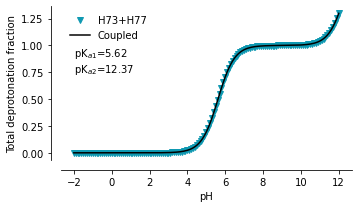

In [23]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1, 1, 1)
sns.despine(offset=10, ax=ax)
ax.set_ylabel(r"Total deprotonation fraction")
ax.set_xlabel(r"pH")

popt, pcov = curve_fit(couple, pHs, 2-H73_curve-H77_curve, p0=[8, 8], maxfev=100000)
coup = couple(pHs, popt[0], popt[1])
print(popt)
plt.plot(pHs, 2-H73_curve-H77_curve, 'v', color='#0f99b2', linewidth=0.5, label='H73+H77')
plt.plot(pHs, coup, label='Coupled', color='k')

ax.legend(loc='upper left', frameon=False)
ax.text(-2, 0.75, u'pK$_{a1}$='+'{:1.2f}'.format(popt[0])+ '\npK$_{a2}$='+'{:1.2f}'.format(popt[1]))
plt.tight_layout()
plt.savefig('/nfs/homes4/sfan/Projects/Transporters/YiiP/multibind/CpHMD/siteB/figures/coupled_siteB.png', dpi=300)
plt.savefig('/nfs/homes4/sfan/Projects/Transporters/YiiP/multibind/CpHMD/siteB/figures/coupled_siteB.pdf', dpi=300)

[12.37081148  5.61896337]


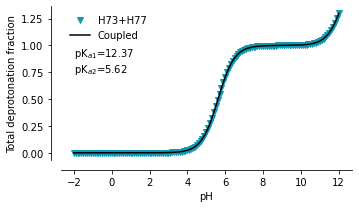

In [31]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1, 1, 1)
sns.despine(offset=10, ax=ax)
ax.set_ylabel(r"Total deprotonation fraction")
ax.set_xlabel(r"pH")

popt, pcov = curve_fit(couple2, pHs, H73_curve+H77_curve, p0=[8, 8], maxfev=100000)
coup = couple2(pHs, popt[0], popt[1])
print(popt)
plt.plot(pHs, 2-H73_curve-H77_curve, 'v', color='#0f99b2', linewidth=0.5, label='H73+H77')
plt.plot(pHs, 2-coup, label='Coupled', color='k')

ax.legend(loc='upper left', frameon=False)
ax.text(-2, 0.75, u'pK$_{a1}$='+'{:1.2f}'.format(popt[0])+ '\npK$_{a2}$='+'{:1.2f}'.format(popt[1]))
plt.tight_layout()
plt.savefig('/nfs/homes4/sfan/Projects/Transporters/YiiP/multibind/CpHMD/siteB/figures/coupled2_siteB.png', dpi=300)
plt.savefig('/nfs/homes4/sfan/Projects/Transporters/YiiP/multibind/CpHMD/siteB/figures/coupled2_siteB.pdf', dpi=300)

[1.00007052 1.11918504]
[[1.76845351e-10 8.15807528e-16]
 [8.15807528e-16 4.30088294e-11]]


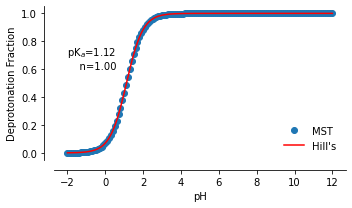

In [12]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1, 1, 1)
sns.despine(offset=10, ax=ax)
ax.set_ylabel(r"Deprotonation Fraction")
ax.set_xlabel(r"pH")

popt, pcov = curve_fit(Hill, pHs, 1-D70_curve, p0=[1,0], maxfev=100000)
fitD70 = Hill(pHs, popt[0], popt[1])
print(popt)
print(pcov)
ax.plot(pHs, 1-D70_curve, 'o', linewidth=0.5, label='MST')
ax.plot(pHs, fitD70, color='#ff0000', label='Hill\'s')

ax.legend(loc='lower right', frameon=False)
ax.text(-2, 0.6, u'pK$_{a}$='+'{:1.2f} \n    n={:1.2f}'.format(popt[1], popt[0]))
plt.tight_layout()

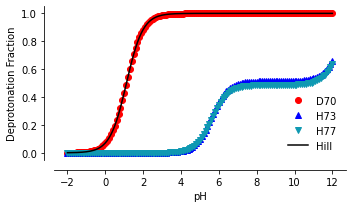

In [20]:
colors = ['#ff0000', '#ff6000', '#00ff00', '#0f99b2', '#0000ff']
symbol = ['o', 's', '^', 'v', 'D']
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1, 1, 1)
sns.despine(offset=10, ax=ax)
ax.set_ylabel(r"Deprotonation Fraction")
ax.set_xlabel(r"pH")

popt, pcov = curve_fit(Hill, pHs, 1-D70_curve, p0=[1,0], maxfev=100000)
fitD70 = Hill(pHs, popt[0], popt[1])
ax.plot(pHs, 1-D70_curve, 'o', color='#ff0000', linewidth=0.5, label='D70')

popt, pcov = curve_fit(Hill, pHs, 1-H73_curve, p0=[1,8], maxfev=100000)
ax.plot(pHs, 1-H73_curve, '^', color='#0000ff', linewidth=0.5, label='H73')

popt, pcov = curve_fit(Hill, pHs, 1-H77_curve, p0=[1,8], maxfev=100000)
fitH77 = Hill(pHs, popt[0], popt[1])
ax.plot(pHs, 1-H77_curve, 'v', color='#0f99b2', linewidth=0.5, label='H77')

ax.plot(pHs, fitD70, color='k', label='Hill')
ax.legend(loc='lower right', frameon=False)
plt.tight_layout()
plt.savefig('/nfs/homes4/sfan/Projects/Transporters/YiiP/multibind/CpHMD/siteB/figures/Hill_siteB.png', dpi=300)
plt.savefig('/nfs/homes4/sfan/Projects/Transporters/YiiP/multibind/CpHMD/siteB/figures/Hill_siteB.pdf', dpi=300)

In [ ]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1, 1, 1)
sns.despine(offset=10, ax=ax)
ax.set_ylabel(r"Deprotonation Fraction")
ax.set_xlabel(r"pH")

popt, pcov = curve_fit(Hill, pHs, 1-D70_curve, p0=[1,8], maxfev=100000)
fitD70 = Hill(pHs, popt[0], popt[1])
print(popt)
print(pcov)
ax.plot(pHs, 1-D70_curve, 'o', linewidth=0.5, label='MST')
ax.plot(pHs, fitD70, color='#ff0000', label='Hill\'s')

ax.legend(loc='upper left', frameon=False)
ax.text(-2, 0.6, u'pK$_{a}$='+'{:1.2f} \n    n={:1.2f}'.format(popt[1], popt[0]))
plt.tight_layout()